<h3 align='center'><b>TEAM ID - 19-AUG-23-CDS-BUN-021-WEM9-CHE</b><h3>
<h5 align='center'><b><center>PROJECT ID - PTID-CDS-JAN-24-1772</center></b></h5>

<h4><b>Business Case </b><h4>
<p style="font-size: 14px;">Bob has started his own mobile company. He wants to give a tough fight to big companies like
Apple, Samsung etc. He does not know how to estimate the price of mobiles his company creates. In this competitive
mobile phone market, you cannot simply assume things. To solve this problem he collects sales data
of mobile phones of various companies. Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory
etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve
this problem.
In this problem you do not have to predict the actual price but a price range indicating how high the
price is.</p>

<h4><b>Problem Statement</b><h4>
<ul>
    <li><span style="font-size: 14px">Make a data analysis using the provided information.</span></li>
    <li><span style="font-size: 14px">Assume the features offered to determine the Price Range.</span></li>
    <li><span style="font-size: 14px">create a model that can anticipate mobile phone prices with accuracy and assist Bob in growing his business.</span></li>
</ul>

In [31]:
## Basic Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
## Import Dataset

data = pd.read_csv('./data/cellphone.csv')

In [33]:
# Display first 5 rows of data.

pd.set_option('display.max_columns', None)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
# Dispaly Last 5 rows of data.

pd.set_option('display.max_columns', None)
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


<h4 style="margin-bottom: 0px"><b>Domain Analysis</b></h4>

<p style="font-size: 14px">The specifications available for different types of phones and mobile devices are listed in the Given Dataset. Given that the price may change depending on the characteristics offered, the dependent variable, "price_range," may also fluctuate.<p>
<style>
    table{
        width: 100%;
        margin: 0;
    }
    th{
        font-size: 14px;
    }
    td{
        font-size: 12px;
    }
    tr > td:first-child{
        font-weight: bold;
    }
</style>
<table>
    <thead>
        <tr>
            <th>Specification</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>battery_power</b></td>
            <td>Total energy a battery can store in one time measured in mAh</td>
        </tr>
        <tr>
            <td><b>blue</b></td>
            <td>Has bluetooth or not</td>
        </tr>
        <tr>
            <td><b>clock_speed</b></td>
            <td>speed at which the micr0processor executes instructions</td>
        </tr>
        <tr>
            <td><b>dual_sim</b></td>
            <td>has dual sim or not</td>
        </tr>
        <tr>
            <td><b>fc</b></td>
            <td>Front Camera mega pixels</td>
        </tr>
        <tr>
            <td><b>four_g</b> </td>
            <td>Has 4G or not</td>
        </tr>
        <tr>
            <td><b>int_memory</b> </td>
            <td>Internal Memory in Gigabytes</td>
        </tr>
        <tr>
            <td><b>m_dep</b> </td>
            <td>Mobile Depth in cm</td>
        </tr>
        <tr>
            <td><b>mobile_wt</b> </td>
            <td>Weight of mobile phone</td>
        </tr>
        <tr>
            <td><b>n_cores</b> </td>
            <td>Number of cores of processor</td>
        </tr>
        <tr>
            <td><b>PC</b> </td>
            <td>Primary Camera mega pixels</td>
        </tr>
        <tr>
            <td><b>px_height</b> </td>
            <td>Pixel Resolution Height</td>
        </tr>
        <tr>
            <td><b>px_width</b> </td>
            <td>Pixel Resolution Width</td>
        </tr>
        <tr>
            <td><b>ram</b> </td>
            <td>Random Access Memory in Megabytes</td>
        </tr>
        <tr>
            <td><b>sc_h</b> </td>
            <td>Screen Height of mobile in cm</td>
        </tr>
        <tr>
            <td><b>sc_w</b> </td>
            <td>Screen Width of mobile in cm</td>
        </tr>
        <tr>
            <td><b>talk_time</b> </td>
            <td>longest time that a single battery charge will last when you are</td>
        </tr>
        <tr>
            <td><b>three_g</b> </td>
            <td>Has 3G or not</td>
        </tr>
        <tr>
            <td><b>touch_screen</b> </td>
            <td>Has touch screen or not</td>
        </tr>
        <tr>
            <td><b>wifi</b> </td>
            <td>Has wifi or not</td>
        </tr>
        <tr>
            <td><b>price_range</b> </td>
            <td>A Target/output variable that is categorized as below
                <ul>
                    <li><b>1 </b>Low Cost</li>
                    <li><b>2 </b>Medium Cost</li>
                    <li><b>3 </b>High Cost</li>
                </ul>
            </td>
        </tr>
    </tbody>
</table>

<h3><b>Basic Checks</b></h3>

In [35]:
# Total No.of Rows and Columns in dataset

rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2000, 21)
Rows: 2000 
Columns: 21


In [36]:
# Columns in dataset

columns = data.columns
for i in range(len(columns)):
    print(f'Column {i}: {columns[i]}')

Column 0: battery_power
Column 1: blue
Column 2: clock_speed
Column 3: dual_sim
Column 4: fc
Column 5: four_g
Column 6: int_memory
Column 7: m_dep
Column 8: mobile_wt
Column 9: n_cores
Column 10: pc
Column 11: px_height
Column 12: px_width
Column 13: ram
Column 14: sc_h
Column 15: sc_w
Column 16: talk_time
Column 17: three_g
Column 18: touch_screen
Column 19: wifi
Column 20: price_range


In [37]:
# Information about Columns in dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<h4><b>Insights</b></h4>
<p style="font-size: 14px">
    Form the above information we can see there are 
    <ul>
        <li style="font-size: 14px"><b>0 </b>Null values</li>
        <li style="font-size: 14px"><b>18 </b>Integer columns and</li>
        <li style="font-size: 14px"><b>2 </b>Float columns</li>
    </ul>
<p>

In [38]:
# Statistical analysis of the dataset

data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<h4 style="margin-bottom: 0px"><b>Insights</b></h4>
<p style="font-size: 14px">
    Form the above Statistical analysis we can find there are
    <div style="display: flex; align-items: center;">
        <ul style="font-size: 14px">
            <li><b>1998 Mah</b> is Maximum Battery power</li>
            <li><b>19 MP</b> is Maximum MP of the front camera</li>
            <li><b>64 GB</b> is Maximum Internal Memory</li>
            <li><b>200</b> is Maximum Weight of the Mobile phones</li>
            <li><b>8</b> is Maximum No.of cores in a Mobile phones</li>
            <li><b>1960</b> is Maximum px_height in a Mobile phones</li>
        </ul>
        <ul style="font-size: 14px">
            <li><b>501 Mah</b> is Minimum Battery power</li>
            <li><b>0 MP</b> is Minimum MP of the front camera</li>
            <li><b>2 GB</b> is Minimum Internal Memory</li>
            <li><b>80</b> is Minimum Weight of the Mobile phones</li>
            <li><b>1</b> is Minimum No.of cores in a Mobile phones</li>
            <li><b>0</b> is Minimum px_height in a Mobile phones</li>
        </ul>
    </div>
    And there are <b>2000</b> rows in the dataset
</p>

In [39]:
# Check for missing values in datasets.

data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    - The above check implies that there are no missing values
</p>

In [40]:
# check for duplicates in datasets.

print(f'The Number of duplicates in the given dataset is {data.duplicated().sum()}')

The Number of duplicates in the given dataset is 0


<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The above check implies that there are no duplicate values</li>
    </ul>
</p>

In [42]:
# no of unique elements in each columns

data.nunique().to_frame().T

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1094,2,26,2,20,2,63,10,121,8,21,1137,1109,1562,15,19,19,2,2,2,4


<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The above check implies unique values in each column in dataset</li>
    </ul>
</p>

In [46]:
# Check for Outliers in the given dataset

numerical_columns = ["battery_power", "clock_speed", "fc", "int_memory", "mobile_wt", "pc", "px_height", "px_width",
                    "ram", "sc_h", "sc_w", "talk_time"]

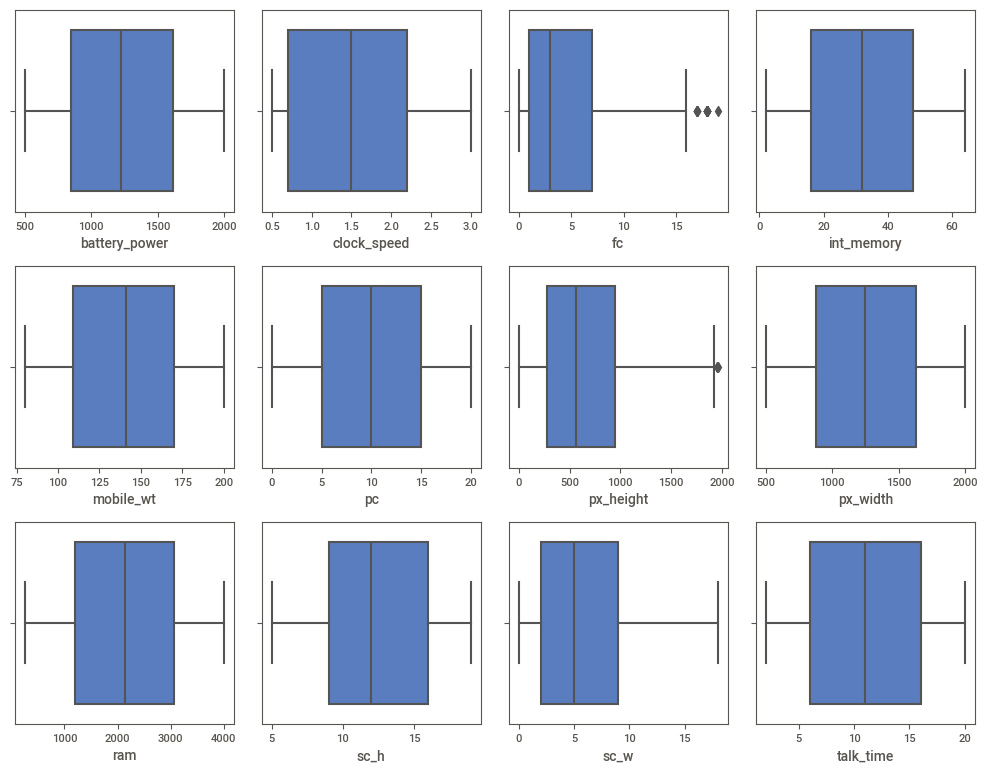

In [53]:
# Box Plot for identifying the outliers in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <= len(numerical_columns):
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=data[column], palette="muted")
        plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The graph implies <b>fc</b> and <b>px_height</b> columns has the outliers.</li>
    </ul>
</p>